In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight,compute_sample_weight

In [108]:
pip install shap


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import shap


In [5]:
shap.initjs()


In [6]:
df = pd.read_csv("HR-Employee-Attrition.csv")

In [7]:
df.sample(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1000,52,No,Travel_Rarely,258,Research & Development,8,4,Other,1,1409,...,3,80,0,12,2,1,5,4,0,4
702,30,No,Travel_Rarely,231,Sales,8,2,Other,1,982,...,1,80,1,10,2,4,8,4,7,7
89,46,Yes,Travel_Rarely,669,Sales,9,2,Medical,1,118,...,4,80,0,9,3,3,9,8,4,7
992,39,No,Non-Travel,1485,Research & Development,25,2,Life Sciences,1,1397,...,2,80,1,13,2,3,6,4,0,5
199,38,No,Travel_Rarely,1084,Research & Development,29,3,Technical Degree,1,273,...,1,80,1,9,3,1,7,7,1,7
503,34,No,Travel_Rarely,1397,Research & Development,1,5,Life Sciences,1,683,...,4,80,1,10,4,2,10,9,8,8
1290,34,Yes,Travel_Frequently,234,Research & Development,9,4,Life Sciences,1,1807,...,3,80,1,11,3,2,7,1,0,7
122,56,Yes,Travel_Rarely,441,Research & Development,14,4,Life Sciences,1,161,...,1,80,3,7,2,3,5,4,4,3
790,33,No,Travel_Rarely,654,Research & Development,5,3,Life Sciences,1,1099,...,3,80,1,9,2,3,3,2,1,2
574,34,No,Travel_Rarely,182,Research & Development,1,4,Life Sciences,1,797,...,3,80,0,10,2,3,4,2,1,3


In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
selected_columns = [
    'Attrition',
    'Age',
    'Gender',
    'JobSatisfaction',
    'MaritalStatus',
    'WorkLifeBalance',
    'YearsAtCompany',
    'YearsSinceLastPromotion'
]

df1 = df[selected_columns]

df1.sample(5)

,Attrition,Age,Gender,JobSatisfaction,MaritalStatus,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
417,No,40,Female,3,Married,3,20,1
96,No,24,Female,3,Married,2,3,0
442,No,36,Male,4,Single,2,10,9
976,No,56,Male,2,Married,3,19,15
684,No,40,Male,2,Divorced,2,1,0


In [10]:
# Encode categorical variables
label_enc = LabelEncoder()
df1["Gender"] = label_enc.fit_transform(df1["Gender"])
df1["MaritalStatus"] = label_enc.fit_transform(df1["MaritalStatus"]) 
df1["Attrition"] = label_enc.fit_transform(df1["Attrition"]) # Target variable encoding

C:\Users\TANMAY\AppData\Local\Temp\ipykernel_13080\3033914962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Gender"] = label_enc.fit_transform(df1["Gender"])
C:\Users\TANMAY\AppData\Local\Temp\ipykernel_13080\3033914962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["MaritalStatus"] = label_enc.fit_transform(df1["MaritalStatus"])
C:\Users\TANMAY\AppData\Local\Temp\ipykernel_13080\3033914962.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [11]:
X = df1.drop('Attrition', axis=1)  # Features
Y = df1['Attrition']             # Target variable

In [12]:
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32


In [13]:
print(X)

      Age  Gender  JobSatisfaction  MaritalStatus  WorkLifeBalance  \
0      41       0                4              2                1   
1      49       1                2              1                3   
2      37       1                3              2                3   
3      33       0                3              1                3   
4      27       1                2              1                3   
...   ...     ...              ...            ...              ...   
1465   36       1                4              1                3   
1466   39       1                1              1                3   
1467   27       1                2              1                3   
1468   49       1                2              1                2   
1469   34       1                3              1                4   

      YearsAtCompany  YearsSinceLastPromotion  
0                  6                        0  
1                 10                        1  
2              

In [14]:
df1.sample(10)

,Attrition,Age,Gender,JobSatisfaction,MaritalStatus,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
1457,0,40,0,3,1,3,5,0
1014,0,31,0,2,2,4,3,1
795,0,37,0,4,0,3,1,0
755,0,45,0,4,1,4,9,1
637,0,32,1,4,0,3,3,0
327,1,39,0,3,1,2,1,0
739,0,27,0,4,1,3,3,2
985,1,31,1,3,1,2,10,6
989,0,37,1,3,1,3,6,1
601,0,40,1,3,2,3,1,0


In [15]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

In [16]:
X_train

,Age,Gender,JobSatisfaction,MaritalStatus,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
853,19,1,1,2,3,1,0
435,33,1,3,1,4,7,7
587,52,0,3,1,3,5,1
1170,27,1,4,2,2,4,1
159,34,0,3,1,3,4,1
...,...,...,...,...,...,...,...
365,46,0,3,1,4,1,0
963,38,0,1,0,3,7,1
734,22,1,1,1,2,4,1
1315,36,0,2,1,3,1,0


In [17]:
Y_train

853     0
435     1
587     0
1170    0
159     0
       ..
365     0
963     0
734     0
1315    0
1292    0
Name: Attrition, Length: 1029, dtype: int32

In [18]:
X_test

,Age,Gender,JobSatisfaction,MaritalStatus,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
397,25,0,4,2,3,5,1
832,37,0,4,0,3,6,1
483,35,1,4,2,3,3,0
456,31,1,4,0,2,5,0
1342,34,1,4,1,3,5,1
...,...,...,...,...,...,...,...
416,38,1,4,1,3,1,0
1098,40,1,4,0,3,2,2
514,33,1,1,2,3,10,9
1442,29,1,4,1,4,2,2


In [19]:
Y_test

397     0
832     0
483     0
456     0
1342    0
       ..
416     0
1098    0
514     1
1442    1
268     0
Name: Attrition, Length: 441, dtype: int32

In [20]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)
dt_predictions = dt_classifier.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(Y_test, dt_predictions))
print("Decision Tree Classification Report:\n", classification_report(Y_test, dt_predictions))

Decision Tree Accuracy: 0.7664399092970522
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       370
           1       0.28      0.30      0.29        71

    accuracy                           0.77       441
   macro avg       0.57      0.58      0.57       441
weighted avg       0.77      0.77      0.77       441



In [21]:
# 3. Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)
rf_predictions = rf_classifier.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(Y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(Y_test, rf_predictions))

Random Forest Accuracy: 0.8163265306122449
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       370
           1       0.29      0.10      0.15        71

    accuracy                           0.82       441
   macro avg       0.57      0.53      0.52       441
weighted avg       0.76      0.82      0.78       441



In [22]:
# Compute class weights for Decision Tree & Random Forest
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(Y_train), y= Y_train)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [23]:
# Initialize models with class weights
dt_model = DecisionTreeClassifier(random_state=42, class_weight=class_weight_dict)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight_dict)

In [24]:
# Train models
dt_model.fit(X_train, Y_train)
rf_model.fit(X_train, Y_train)

RandomForestClassifier(class_weight={0: 0.5961761297798378,
                                     1: 3.0993975903614457},
                       random_state=42)

In [25]:
# Make predictions
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

In [26]:
# Evaluate models
def evaluate_model(name, Y_test, preds):
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(Y_test, preds))
    print(classification_report(Y_test, preds))

evaluate_model("Decision Tree", Y_test, dt_preds)
evaluate_model("Random Forest", Y_test, rf_preds)


Decision Tree Performance:
Accuracy: 0.7482993197278912
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       370
           1       0.22      0.23      0.22        71

    accuracy                           0.75       441
   macro avg       0.54      0.54      0.54       441
weighted avg       0.75      0.75      0.75       441


Random Forest Performance:
Accuracy: 0.8117913832199547
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       370
           1       0.25      0.08      0.13        71

    accuracy                           0.81       441
   macro avg       0.55      0.52      0.51       441
weighted avg       0.75      0.81      0.77       441



# Shap Values For Decision Tree Model

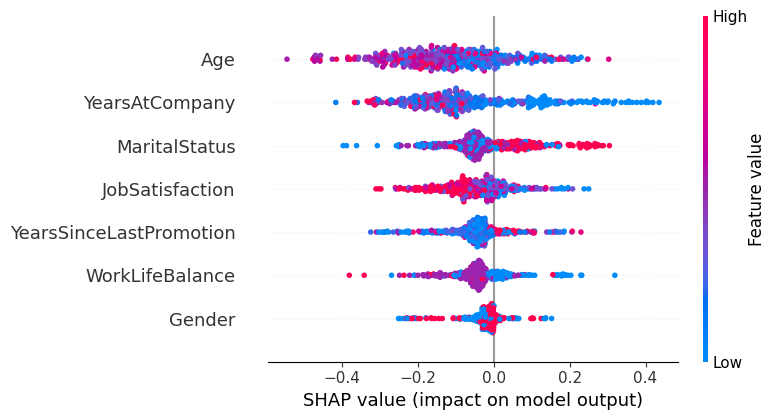

In [42]:

explainer1 = shap.TreeExplainer(dt_model)
shap_values = explainer1.shap_values(X_test)
shap.summary_plot(shap_values[:, :, 1], X_test)







# Shap Values For Random Forest

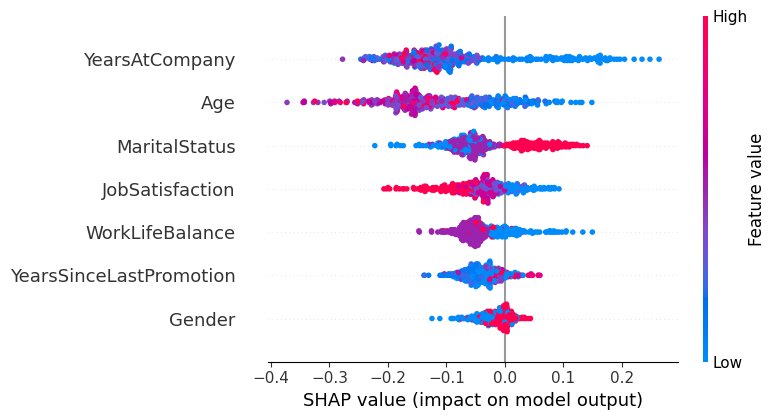

In [41]:
explainer2 = shap.TreeExplainer(rf_model)
shap_values = explainer2.shap_values(X_test)
shap.summary_plot(shap_values[:, :, 1], X_test)



# Model Accuracy Report & Confusion Matrix for Both the Models


Decision Tree Performance:
Accuracy: 0.7482993197278912

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       370
           1       0.22      0.23      0.22        71

    accuracy                           0.75       441
   macro avg       0.54      0.54      0.54       441
weighted avg       0.75      0.75      0.75       441



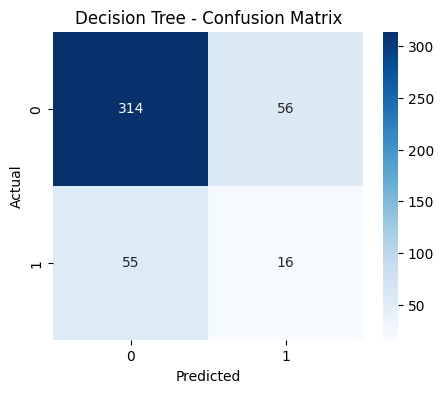


Random Forest Performance:
Accuracy: 0.8117913832199547

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       370
           1       0.25      0.08      0.13        71

    accuracy                           0.81       441
   macro avg       0.55      0.52      0.51       441
weighted avg       0.75      0.81      0.77       441



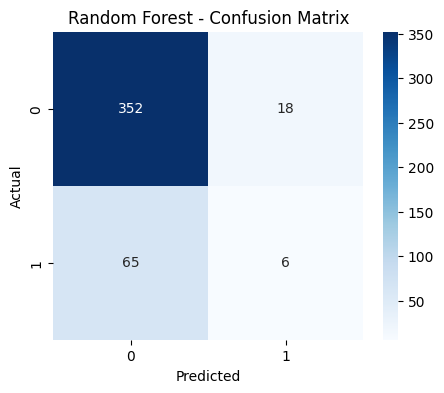

In [48]:
# Function to show classification report and confusion matrix
def model_accuracy_report_and_confusion_matrix(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance:")
    acc = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {acc}\n")
    print(classification_report(y_true, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    mp.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
    mp.title(f'{model_name} - Confusion Matrix')
    mp.xlabel('Predicted')
    mp.ylabel('Actual')
    mp.show()

# Run for Decision Tree
model_accuracy_report_and_confusion_matrix(Y_test, dt_preds, "Decision Tree")

# Run for Random Forest
model_accuracy_report_and_confusion_matrix(Y_test, rf_preds, "Random Forest")